# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
api_key #this was a test to see if my api key was successfully stored 

'15557633fe5d94bc7cada488e308c88c'

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [8]:
# First need to create a container to hold the results: 
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

# Set the base url to tell it what to work with 
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #select units as found in api documentation 
query_url = f"{base_url}appid={api_key}&units={units}&q=" #search url as dictated by the api documentation using f string


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json() #requests.get method to extract the data 
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
print("Complete")

Processing Record 1 of Set 1 : daru
Processing Record 2 of Set 1 : punta arenas
Processing Record 3 of Set 1 : mizan teferi
Processing Record 4 of Set 1 : jamestown
Processing Record 5 of Set 1 : nikolskoye
Processing Record 6 of Set 1 : rikitea
Processing Record 7 of Set 1 : hermanus
Processing Record 8 of Set 1 : kruisfontein
City not found. Skipping...
Processing Record 9 of Set 1 : mataura
Processing Record 10 of Set 1 : saint-pierre
City not found. Skipping...
Processing Record 11 of Set 1 : yellowknife
Processing Record 12 of Set 1 : barrow
Processing Record 13 of Set 1 : lebu
Processing Record 14 of Set 1 : cayenne
Processing Record 15 of Set 1 : komsomolskiy
Processing Record 16 of Set 1 : busselton
Processing Record 17 of Set 1 : bredasdorp
Processing Record 18 of Set 1 : thompson
Processing Record 19 of Set 1 : vaini
Processing Record 20 of Set 1 : new norfolk
Processing Record 21 of Set 1 : cabo san lucas
Processing Record 22 of Set 1 : meulaboh
Processing Record 23 of Set 1

Processing Record 33 of Set 4 : beyneu
Processing Record 34 of Set 4 : basqal
Processing Record 35 of Set 4 : guerrero negro
Processing Record 36 of Set 4 : sitka
City not found. Skipping...
Processing Record 37 of Set 4 : benjamin constant
Processing Record 38 of Set 4 : san juan
Processing Record 39 of Set 4 : raudeberg
Processing Record 40 of Set 4 : butaritari
Processing Record 41 of Set 4 : sangre grande
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 4 : santa isabel do rio negro
Processing Record 43 of Set 4 : suntar
Processing Record 44 of Set 4 : mar del plata
Processing Record 45 of Set 4 : cartagena del chaira
Processing Record 46 of Set 4 : tonantins
Processing Record 47 of Set 4 : inirida
Processing Record 48 of Set 4 : bengkulu
Processing Record 49 of Set 4 : parkes
Processing Record 50 of Set 4 : hovd
Processing Record 0 of Set 5 : ashland
Processing Record 1 of Set 5 : ponta do sol
Processing Record 2 of Set 5 : atuona
Processing Reco

Processing Record 16 of Set 8 : tasiilaq
Processing Record 17 of Set 8 : harboore
Processing Record 18 of Set 8 : richards bay
Processing Record 19 of Set 8 : kalmunai
Processing Record 20 of Set 8 : vestmannaeyjar
Processing Record 21 of Set 8 : koslan
City not found. Skipping...
Processing Record 22 of Set 8 : minsk
City not found. Skipping...
Processing Record 23 of Set 8 : zhumadian
City not found. Skipping...
Processing Record 24 of Set 8 : fairbanks
Processing Record 25 of Set 8 : olpad
Processing Record 26 of Set 8 : chandbali
Processing Record 27 of Set 8 : hualmay
City not found. Skipping...
Processing Record 28 of Set 8 : buala
Processing Record 29 of Set 8 : sidney
Processing Record 30 of Set 8 : goure
Processing Record 31 of Set 8 : chuy
Processing Record 32 of Set 8 : yulara
Processing Record 33 of Set 8 : tomatlan
Processing Record 34 of Set 8 : faanui
Processing Record 35 of Set 8 : fare
Processing Record 36 of Set 8 : ciudad bolivar
Processing Record 37 of Set 8 : plouz

Processing Record 2 of Set 12 : hobyo
Processing Record 3 of Set 12 : nambutalai
Processing Record 4 of Set 12 : ishigaki
Processing Record 5 of Set 12 : killam
City not found. Skipping...
Processing Record 6 of Set 12 : pokrov
Processing Record 7 of Set 12 : bang saphan
Processing Record 8 of Set 12 : sao joao da barra
Processing Record 9 of Set 12 : shingu
Processing Record 10 of Set 12 : kangaatsiaq
Processing Record 11 of Set 12 : la grande
Processing Record 12 of Set 12 : tombouctou
Processing Record 13 of Set 12 : ndola
Processing Record 14 of Set 12 : bardiyah


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# To create a dataframe need to create a list of dictionaries or a dictionary of lists 
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,  #the order these are written is the order they will appear in the dataframe
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list,
})

weather_dict #display the newly created dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Daru,-9.0763,143.2092,79.34,87,100,10.07,PG,1611351610
1,Punta Arenas,-53.1500,-70.9167,57.20,33,40,21.85,CL,1611351610
2,Mīzan Teferī,6.9833,35.5833,66.09,58,86,2.73,ET,1611351610
3,Jamestown,42.0970,-79.2353,23.00,86,90,16.11,US,1611351423
4,Nikolskoye,59.7035,30.7861,35.60,87,40,15.66,RU,1611351611
...,...,...,...,...,...,...,...,...,...
570,Kangaatsiaq,68.3065,-53.4641,13.42,85,48,7.78,GL,1611351750
571,La Grande,45.3246,-118.0877,37.00,87,99,3.27,US,1611351750
572,Tombouctou,20.0000,-3.0000,66.74,20,47,9.95,ML,1611351751
573,Ndola,-12.9587,28.6366,64.20,98,100,3.87,ZM,1611351751


In [12]:
weather_dict.count() #testing to make sure each row has an equal amount of data

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [17]:
# Exporting the data to a .csv; will be saved into the output_data folder ../ is telling computer to go up one directory 
weather_dict.to_csv("../output_data/cities_data.csv", index = False) #setting the index to false so i don't have an additional index column

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
humidity = weather_dict["Humidity"].max()
humidity #using the .max() method to see what the max value is in the humidity column; it is 100 so we can skip the removal

100

In [6]:
# Starter code uses a .describe() method which all shows us that the max humidity is 100

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# we know that nothing over 100 exists so we may skip this part 

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

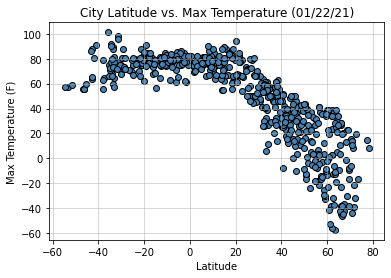

In [22]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/22/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha=0.5) #recall alpha is the amount of opaqueness 

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

In the plot above we are analyzing the effect on max temperature with regards to a city's latitude.  One would expect to see the max temperature decrease as latitude increases, which is evidenced by the plot.

## Latitude vs. Humidity Plot

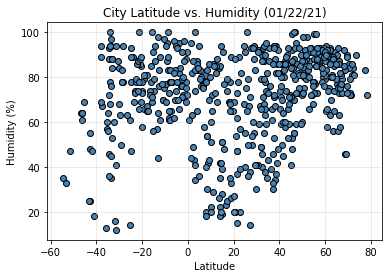

In [23]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/22/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=0.5, alpha=0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

In the plot above we are analyzing the effect on the percentage of humidity with regards to a city's latitude.  One would expect to see humidity decrease as latitude increases, however there is no strong evidence in the plot.

## Latitude vs. Cloudiness Plot

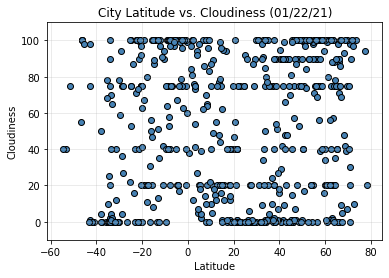

In [28]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/22/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")
plt.ylim(-10,110) #setting this to get a better picture of the data 

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha=0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

In the plot above we are analyzing the trend between cloudiness and a city's latitude.  One would expect to see more clouds as latitude increases, however there is no strong evidence in the plot.

## Latitude vs. Wind Speed Plot

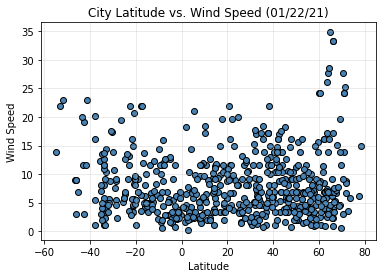

In [29]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (01/22/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

In the plot above we are analyzing the trend between wind speed and a city's latitude.  One would expect to see windier conditions as latitude increases.

## Linear Regression

In [61]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0] #northern hemisphere is where latitude is >= 0
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0] #southern hemisphere is where latitude is <0

In [65]:
# Define a function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regression_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

The r-squared is : -0.84
The r-squared is : -0.84


ValueError: too many values to unpack (expected 5)

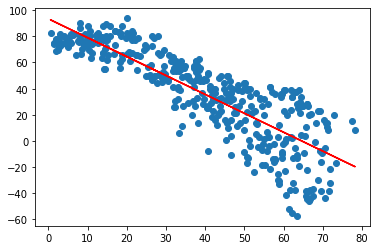

In [66]:
# Call on function 1

equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call on function 2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.3
The r-squared is : 0.3


ValueError: too many values to unpack (expected 5)

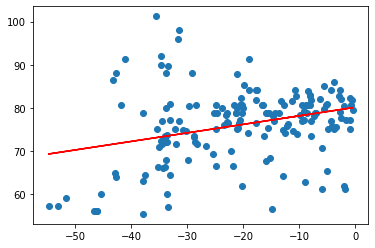

In [67]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call on function 2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.41
The r-squared is : 0.41


ValueError: too many values to unpack (expected 5)

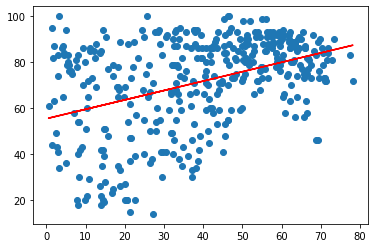

In [68]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call on function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.4
The r-squared is : 0.4


ValueError: too many values to unpack (expected 5)

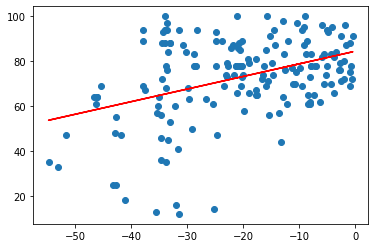

In [69]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call on function 2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21
The r-squared is : 0.21


ValueError: too many values to unpack (expected 5)

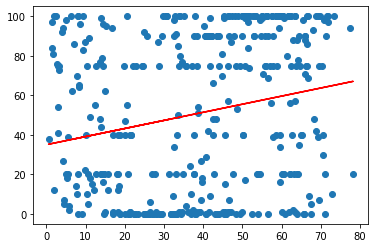

In [70]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call on function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.33
The r-squared is : 0.33


ValueError: too many values to unpack (expected 5)

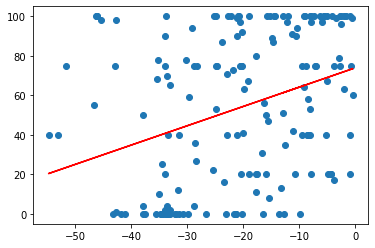

In [58]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call on function 2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.14
The r-squared is : 0.14


ValueError: too many values to unpack (expected 5)

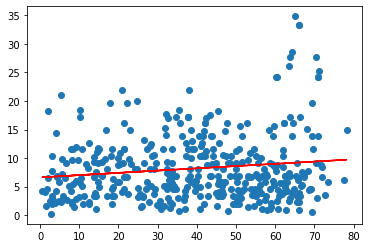

In [59]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call on function 2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.32
The r-squared is : -0.32


ValueError: too many values to unpack (expected 5)

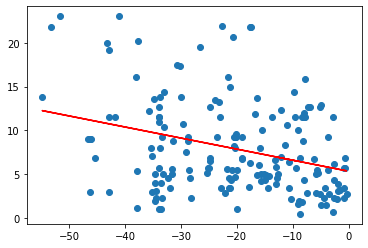

In [71]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call on function 2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")